# Text Mining 

In [1]:
#!pip install -U spacy

In [2]:
#!python -m spacy download en

In [3]:
#perform sentimental amalysis
import pandas as pd #data processing
import numpy as np #linear algebra
import string #special operation on string 
import spacy #language model 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import wordcloud
from wordcloud  import WordCloud,STOPWORDS
%matplotlib inline

In [9]:
elon_musk_data = pd.read_csv(r"C:\Users\WAY TOMORROW\Desktop\jupyternotebook\data science 17032022batch\Data Science Assignments\11) text mining\Elon_musk.csv", encoding = "latin")
elon_musk_data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
#!pip install wordcloud

In [10]:
elon_musk_data.drop(['Unnamed: 0'],inplace=True,axis=1)
elon_musk_data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text pre-processing

In [11]:
elon_musk_data= [Text.strip() for Text in elon_musk_data.Text] #remove both the leading and the trailing characters
elon_musk_data = [Text for Text  in elon_musk_data if Text] # remove empty strings, because they are considered in python as False

In [12]:
# joining the list into one string or Text
text_data = ' '.join(elon_musk_data)
text_data

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [13]:
#Punctuation
no_punc_text = text_data.translate(str.maketrans('','', string.punctuation)) #with arguements (x, y, z) where 'x' and 'y'
# must be equal-length string and characters in 'x'
# are replaced by caharcters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [14]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [15]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\WAY
[nltk_data]     TOMORROW\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\WAY
[nltk_data]     TOMORROW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.tokenize import word_tokenize
token_text=word_tokenize(no_url_text)
print(token_text)

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil'

In [17]:
#Token couts
len(token_text)

20423

In [18]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.append('the')
no_stop_token = [word for word in token_text if not word in stop_words]
print(no_stop_token)

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001

In [19]:
#normalize the data
lower_case = [x.lower() for x in no_stop_token]
print(lower_case)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001

In [20]:
#stemming 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stem_tokens = [ps.stem(word) for word in lower_case]
print(stem_tokens)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'thi', 'true', 'power', 'haha', 'freewalletorg', 'ani', 'cr

In [21]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_case))
print(doc)

kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet wont give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predic

In [22]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true'

In [23]:
clean_tweet = ' '.join(lemmas)
clean_tweet

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyewest geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasona

## Feature Extraction

### 1. Using countvectorizer 

In [25]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 58.8 kB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=a60da84612780d6feb6947bea3ba4c4e46bcef21adaca21632a3835e63391414
  Stored in directory: c:\users\way tomorrow\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(lemmas)

In [27]:
print(vectorizer.vocabulary_)

{'kunalb11': 2045, 'alien': 229, 'idaacarmack': 1784, 'ray': 2950, 'trace': 3810, 'cyberpunk': 962, 'hdr': 1671, 'nextlevel': 2492, 'have': 1665, 'try': 3845, 'joerogan': 1965, 'spotify': 3437, 'great': 1606, 'interview': 1894, 'gtera27': 1624, 'doge': 1115, 'underestimate': 3975, 'teslacn': 3658, 'congratulation': 855, 'tesla': 3652, 'china': 739, 'amazing': 255, 'execution': 1327, 'last': 2064, 'year': 4248, 'now': 2532, 'next': 2491, 'even': 1298, 'happy': 1652, 'new': 2488, 'ox': 2650, 'frodo': 1492, 'underdoge': 3974, 'all': 232, 'thought': 3735, 'would': 4224, 'fail': 1363, 'himself': 1717, 'owenspark': 2646, 'flcnhvy': 1434, 'anonyx10': 284, 'haha': 1638, 'thanks': 3695, 'indeed': 1834, 'tweet': 3864, 'definitely': 1017, 'represent': 3033, 'realworld': 2975, 'time': 3753, 'allocation': 234, 'the': 3702, 'entertaining': 1254, 'outcome': 2626, 'likely': 2126, 'givedirectly': 1577, 'just': 1993, 'send': 3214, 'agree': 200, 'clubhouse': 780, 'kanyewest': 2002, 'geoffkeighley': 1557,

In [28]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray())

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\WAY TOMORROW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
print(X.toarray().shape)

(15123, 4281)


## 2.  Countvectorize with N-grams (Bigrams &Trigrams)

In [30]:
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)


In [31]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'year', 'yes', 'you'

## 3. TF-IDF vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [33]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '28delayslater', '30', '60', 'able', 'absolutely', 'accurate', 'actually', 'adamklotz', 'add', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appreciate', 'archillect', 'around', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunkgame', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'design', 'detail', 'didn', 'difference', 'different', 'djsnm', '

## Generate word cloud

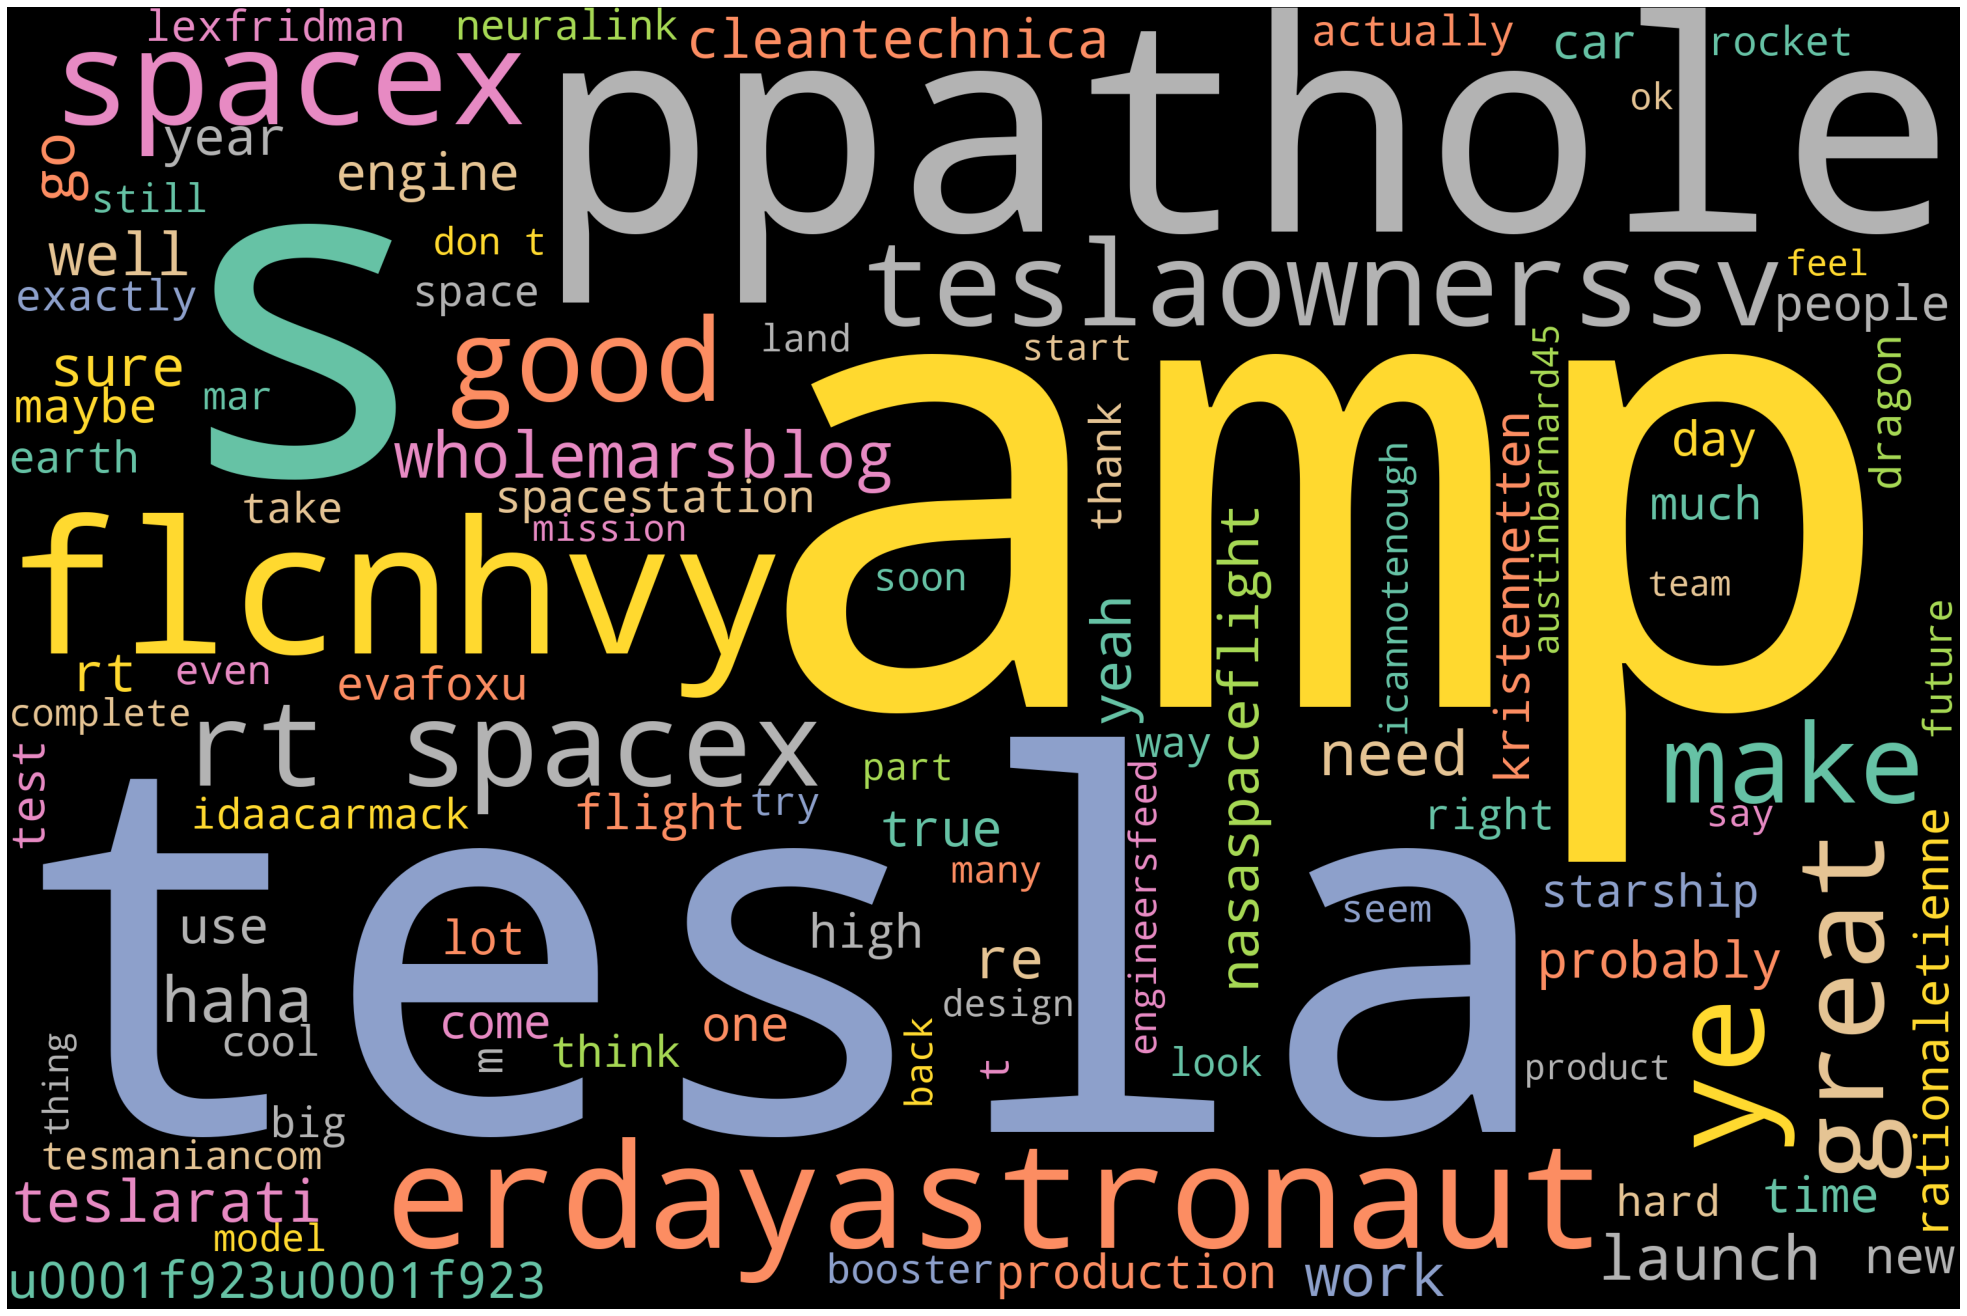

In [34]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(35,25))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate wordcloud

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tweet)
# Plot
plot_cloud(wordcloud)

In [35]:
# Part of speech  Tagging

nlp = spacy.load("en_core_web_sm")
one_block = clean_tweet
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


In [36]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 PROPN
im PROPN
alien ADJ
idaacarmack NOUN
ray NOUN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestimate ADJ
teslacn PROPN
congratulation NOUN
tesla VERB
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge ADJ
all DET
thought NOUN
would AUX
fail VERB
himself PRON
owenspark PROPN
flcnhvy PROPN
anonyx10 PROPN
haha PROPN
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld PROPN
time PROPN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
givedirectly ADV
just ADV
send AUX
just ADV
agree VERB
clubhouse PROPN
kanyewest PROPN
geoffkeighley PROPN
unrealengine ADJ
its PROPN
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x PUNCT
toddler NOUN
hodler NOUN
joshmanmode NOUN
he PRON
definitely ADV
issue VERB
sentencing NOUN
seem

In [37]:
#filtering for nouns and verbs only 
noun_verb = [token.text for token in doc_block if  token.pos_ in  ('NOUN', 'VERB')]
print(noun_verb)

['idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'congratulation', 'tesla', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'represent', 'allocation', 'outcome', 'agree', 'get', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'joshmanmode', 'issue', 'sentencing', 'seem', 'bit', 'thank', 'fix', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'power', 'crypto', 'wallet', 'won\x92t', 'give', 'avoid', 'cost', 'app', 'suck', 'launch', 'element', 'gateway', 'mission', 'blkmdl3', 'predict', 'cash', 'flow', 'starlink', 'adamklotz', 'starlink', 'endeavor', 'adamklotz', 'spacex', 'pass', 'chasm', 'cash', 'flow', 'year', 'idaacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'adamklotz', 'price', 'country', 'difference', 'taxis', 'intend', 'earth', 'idea', 'apply', 'tesla', 'danzpalmer', 'xprize', 'team', 'manage', 'carbon', 'capture', 'prize', 'tesla', 'receive', 'stock', 'comp'

In [38]:
#counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(noun_verb)
sum_words = X.sum(axis=0)
words_frequency = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_frequency = sorted(words_frequency,key = lambda x: x[1],reverse=True)
wf_df = pd.DataFrame(words_frequency)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,tesla,142
1,amp,99
2,erdayastronaut,73
3,spacex,66
4,make,64
...,...,...
2281,answer,1
2282,tweet,1
2283,priority,1
2284,propaganda,1


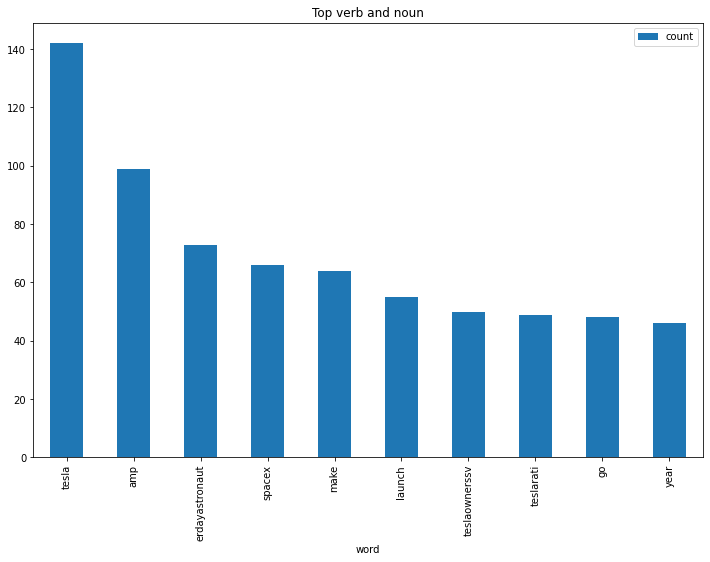

In [39]:
#Visualizing results
# Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word',figsize = (12,8),title='Top verb and noun')
plt.show()

## Emotion Mining - sentiment analysis

In [40]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(' '.join(elon_musk_data))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [41]:
sent_dataframe = pd.DataFrame(sentence,columns=['sentence'])
sent_dataframe

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [47]:
!pip install afinn

In [54]:
# Emotion Lexican - Affin
from afinn import Afinn
affin = pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

FileNotFoundError: [Errno 2] No such file or directory: 'Afinn.csv'

In [52]:
affinity_score = affin.set_index('word')['value'].to_dict()
affinity_score

AttributeError: 'Afinn' object has no attribute 'set_index'

In [53]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_score

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

NameError: name 'affinity_score' is not defined

In [ ]:
# test that it works
calculate_sentiment(text = 'amazing')

In [ ]:
sent_dataframe['sentiment_value'] = sent_dataframe['sentence'].apply(calculate_sentiment)

In [44]:
# how many words are in the sentence?
sent_dataframe['word_count'] = sent_dataframe['sentence'].str.split().apply(len)
sent_dataframe['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [45]:
sent_dataframe.sort_values(by='sentiment_value')

KeyError: 'sentiment_value'

In [ ]:
# Sentiment score of the whole review
sent_dataframe['sentiment_value'].describe()

In [ ]:
# negative Sentiment score of the whole review
sent_dataframe[sent_dataframe['sentiment_value']<=0]

In [ ]:
# positive sentiment score of the whole review
sent_dataframe[sent_dataframe['sentiment_value']>0]

In [ ]:
# Adding index cloumn
sent_dataframe['index']=range(0,len(sent_dataframe))
sent_dataframe

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_dataframe['sentiment_value'])
None


In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_dataframe)
plt.show()

In [ ]:
# Correlation analysis
sent_dataframe.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')
None

In [ ]:
import plotly.express as px 

In [ ]:
fig = px.bar(sent_dataframe[:20], x='word_count', y='sentiment_value', title='Counts of top bigrams', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

In [ ]:
fig = px.treemap(sent_dataframe, title='Treemap chart by companies and whether complaint mentions credit report.',
                 path=['word_count','sentiment_value'], color='sentence', color_continuous_scale=px.colors.sequential.GnBu)
fig.show()

In [ ]:
fig = px.bar(sent_dataframe, x='word_count', y='sentiment_value', template='plotly_white', orientation='h',
             labels={'portion': '% of Complaints', 'bigram': 'Bigram', 'company': 'Company'},
             color='sentence', color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_layout(font=dict(size=10, color='DarkSlateGray'))
fig.update_layout(width=1200, height=500)
fig.show()

In [ ]:
fig = px.bar(sent_dataframe,  x='word_count', y='sentiment_value'
             , color='sentence', template='plotly_white', color_discrete_sequence=px.colors.qualitative.Bold
             , labels={'word_count', 'sentiment_value'})
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=0.1, y=1.1))
fig.update_yaxes(title='', showticklabels=False)
fig.show()

# =======================================================

#### let us see how to visualise relation between part of speech    ### just for  example

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
from spacy import displacy
doc=nlp(u'Anil is working on ExcelR assignment.')

import warnings 
warnings.filterwarnings('ignore') 
from matplotlib import pyplot as plt

In [ ]:
displacy.render(doc, style='dep')
plt.show()

In [ ]:
### Now let’s fill in a few colors to this representation with some options:

In [ ]:
doc1=nlp(u'I am working on ExcelR assignment.')
options={'distance':110,'compact':'True', 'color':'white','bg':'red','font':'Times'}
displacy.render(doc1, style='dep',options=options)
plt.show()